# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Introduction

The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan_data_backup = pd.read_csv('3.1 loan_data_2007_2014.csv')

C:\Users\USR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan_data = loan_data_backup.copy()

## Explore Data

In [4]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [5]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [6]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [7]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [9]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

In [11]:
# emp_length

loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

C:\Users\USR\AppData\Local\Temp/ipykernel_6636/1997437426.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [13]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

str

In [14]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
# Transforms the values to numeric.

In [15]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [16]:
loan_data['earliest_cr_line']
# Displays a column.

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.

In [18]:
type(loan_data['earliest_cr_line_date'][0])
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
pd.to_datetime('2020-12-01') - loan_data['earliest_cr_line_date']
# Calculates the difference between two dates and times.

0        13118 days
1         7915 days
2         6970 days
3         9070 days
4         9101 days
            ...    
466280    6454 days
466281    8584 days
466282    6940 days
466283    6513 days
466284    7609 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [20]:
# Assume we are now in December 2017
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2020-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

In [21]:
loan_data['mths_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.

count    466256.000000
mean        275.482430
std          93.974829
min        -576.000000
25%         219.000000
50%         261.000000
75%         321.000000
max         623.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [22]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
# There are 2303 strange negative values.

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-501.0
1770,Sep-68,2068-09-01,-573.0
2799,Sep-64,2064-09-01,-525.0
3282,Sep-67,2067-09-01,-561.0
3359,Feb-65,2065-02-01,-530.0
...,...,...,...
464003,Jan-68,2068-01-01,-565.0
464260,Jul-66,2066-07-01,-547.0
465100,Oct-67,2067-10-01,-562.0
465500,Sep-67,2067-09-01,-561.0


In [23]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
# We set the rows that had negative differences to the maximum value.

C:\Users\USR\AppData\Local\Temp/ipykernel_6636/653136197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [24]:
min(loan_data['mths_since_earliest_cr_line'])
# Calculates and shows the minimum value of a column.

109.0

In [25]:
# term

loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [26]:
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [27]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [28]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [29]:
type(loan_data['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [30]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [31]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [32]:
# issue_d

loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [33]:
# Assume we are now in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [34]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, we are not going to use sub_grade, as it overlaps with grade.

In [35]:
# grade

pd.get_dummies(loan_data['grade'])
# Create dummy variables from a variable.

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [36]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')
# Create dummy variables from a variable.

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [37]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [38]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [39]:
type(loan_data_dummies)
# Returns the type of the variable.

pandas.core.frame.DataFrame

In [40]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

In [41]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values and clean

In [42]:
loan_data.isnull()
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [43]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [44]:
pd.options.display.max_rows = 100
# Sets the pandas dataframe options to display 100 columns/ rows.

In [45]:
# total_rev_hi_lim

# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
# We fill the missing values with the values of another variable.

In [46]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [47]:
# annual_inc

loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [48]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [49]:
# loan_status

loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [50]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [51]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [52]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [53]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

### Splitting Data

In [54]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [55]:
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 418476      418476  13138263   15160434      15000        15000   
 116472      116472   6188412    7660551      10000        10000   
 148580      148580   4276122    5458402      12000        12000   
 195324      195324   1563811    1831035      14600        14600   
 151501      151501   4085412    5217702      33600        33600   
 ...            ...       ...        ...        ...          ...   
 138885      138885   5054751    6376923       7200         7200   
 384534      384534  16842539   18965085      13000        13000   
 86581        86581   7380018    9041964      11500        11500   
 98323        98323   6837380    8459437      10000        10000   
 104473      104473   6646733    2707422      15500        15500   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 418476          15000.0   36 months     15.31       522.26     C        C4   
 116472           9950.0

In [56]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.

In [57]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(349713, 207)

In [58]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(349713,)

In [59]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(116572, 207)

In [60]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(116572,)

In [61]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [62]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(373028, 207)

In [64]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(373028,)

In [65]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(93257, 207)

In [66]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(93257,)

### Data Preparation: An Example

In [67]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
#####
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

In [68]:
df_inputs_prepr['grade'].unique()
# Displays unique values of a column.

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [69]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
# Concatenates two dataframes along the columns.
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [70]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [71]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [72]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.

In [73]:
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [74]:
df1 = df1.iloc[:, [0, 1, 3]]
# Selects only columns with specific indexes.
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [75]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [76]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [77]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [78]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [79]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [80]:
df1 = df1.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [81]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


In [82]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Preprocessing Discrete Variables: Automating Calculaions

In [83]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [84]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Preprocessing Discrete Variables: Visualizing Results

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [86]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

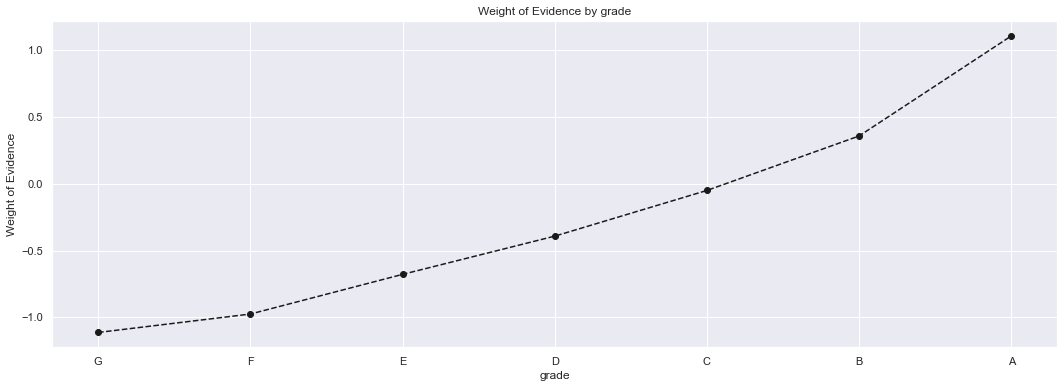

In [87]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [88]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


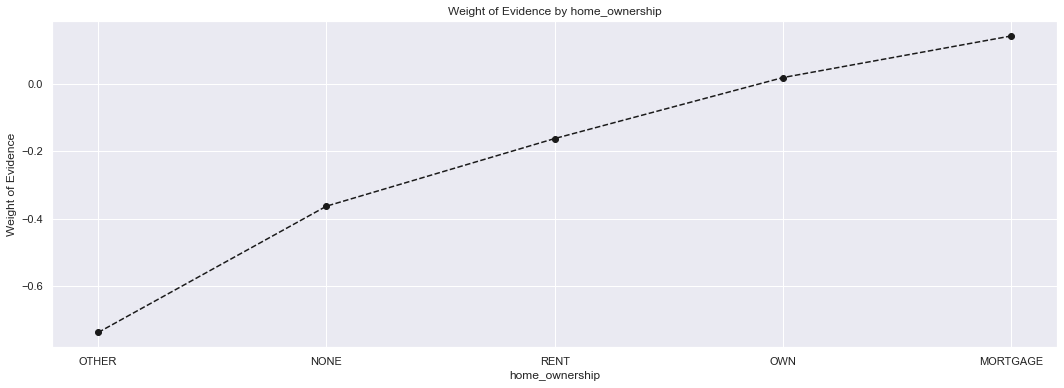

In [89]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [90]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [91]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [92]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


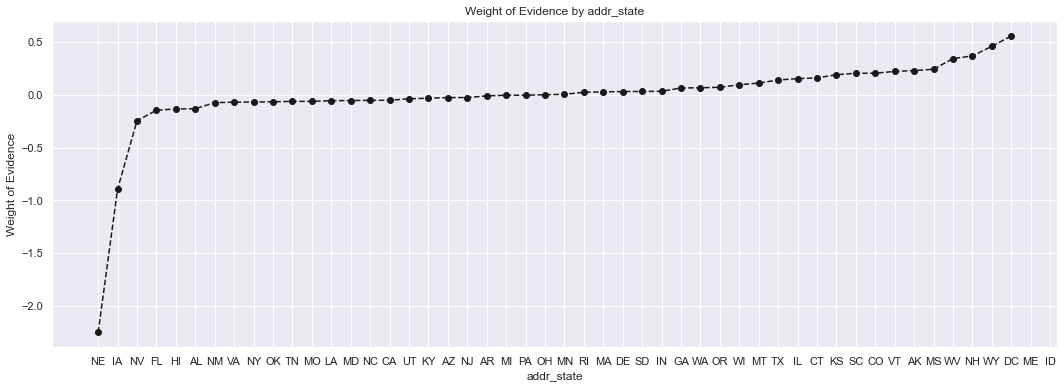

In [93]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [94]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

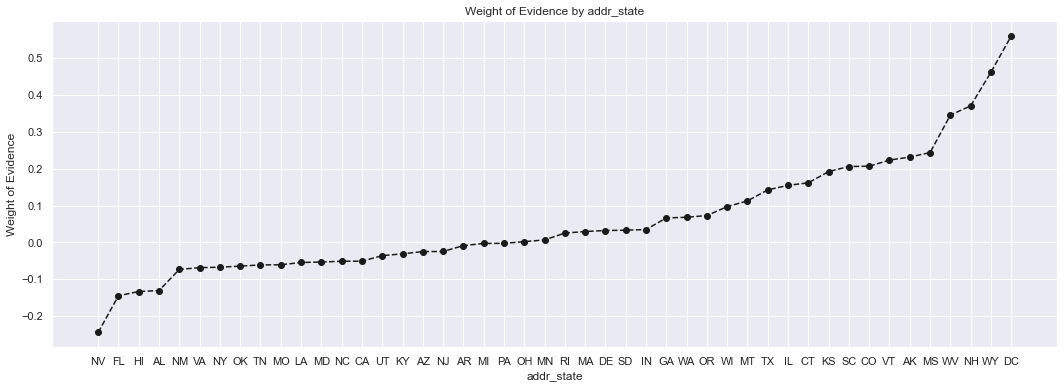

In [95]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

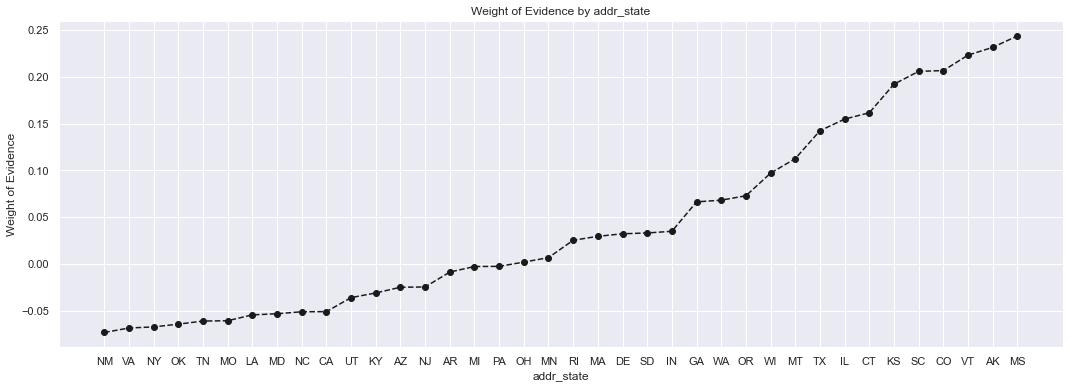

In [96]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [97]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables: Homework

In [98]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


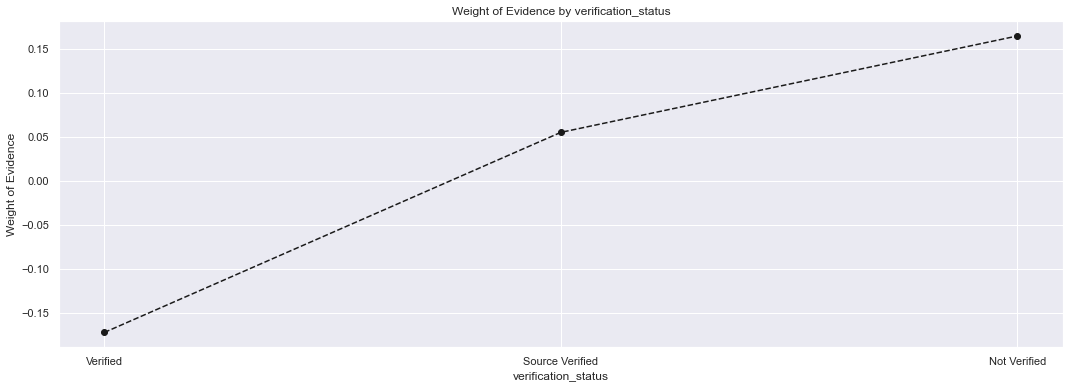

In [99]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [100]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


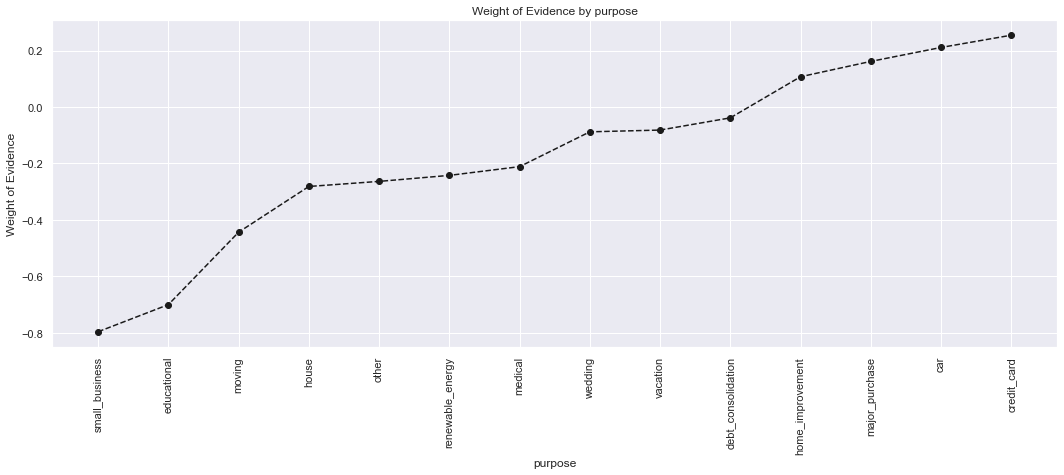

In [101]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [102]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [103]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


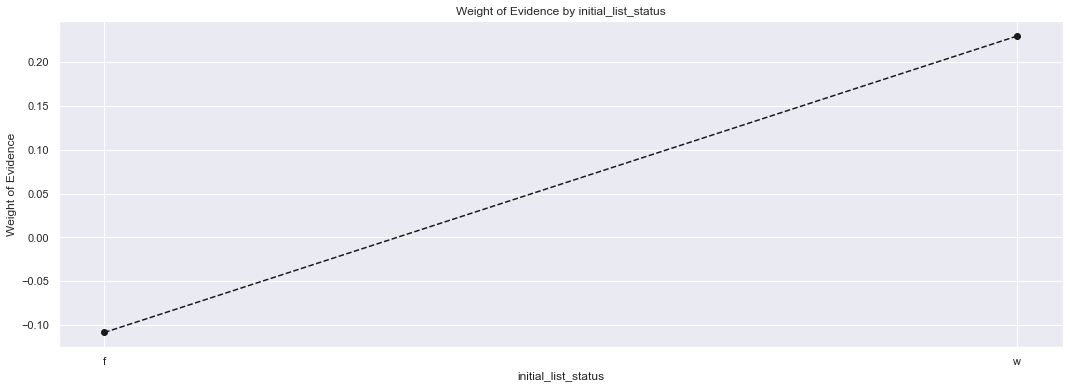

In [104]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [105]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [106]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [107]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


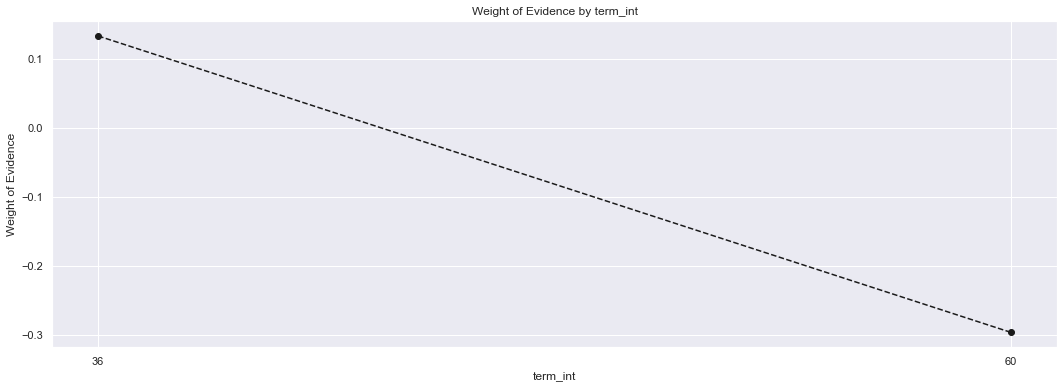

In [108]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [109]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [110]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [111]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


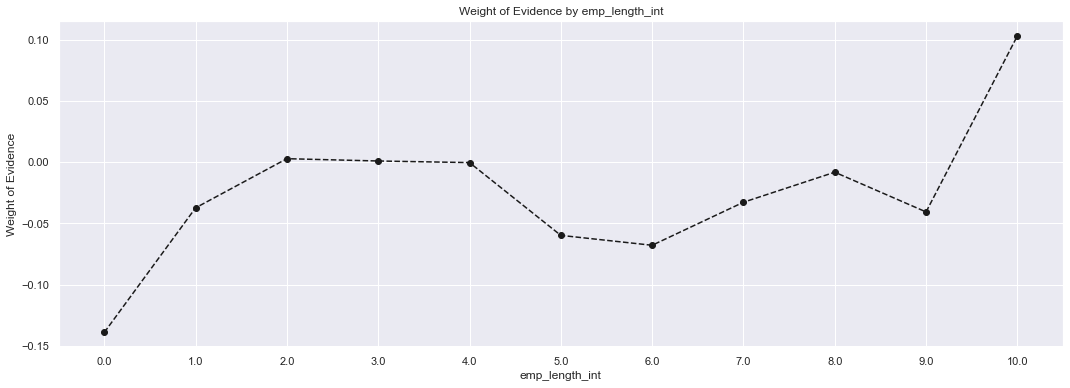

In [112]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [113]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [114]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [115]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [116]:
df_inputs_prepr['mths_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [117]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.002486,0.027758,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.000401,0.004425,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.013660,0.123890,0.113186


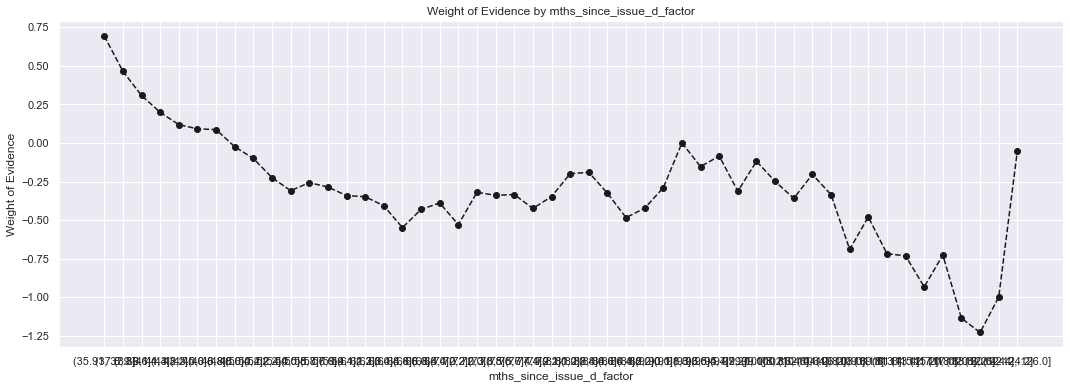

In [118]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

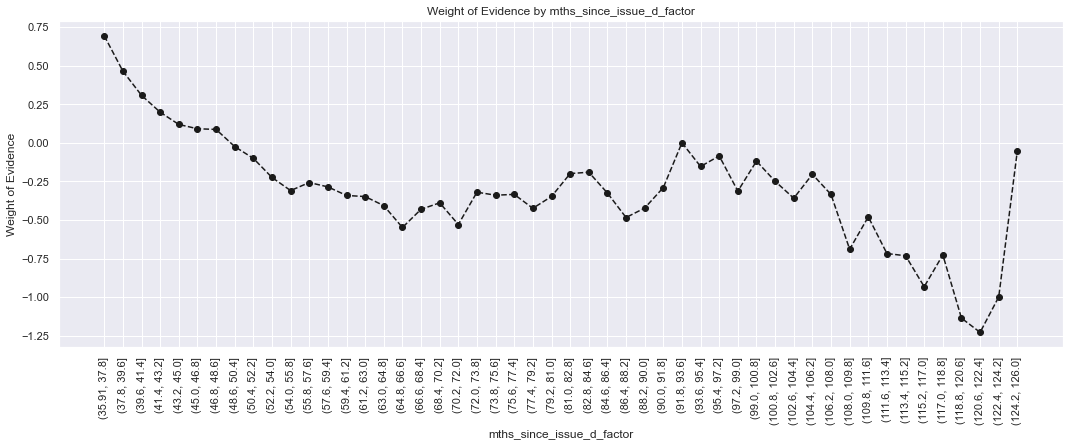

In [119]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

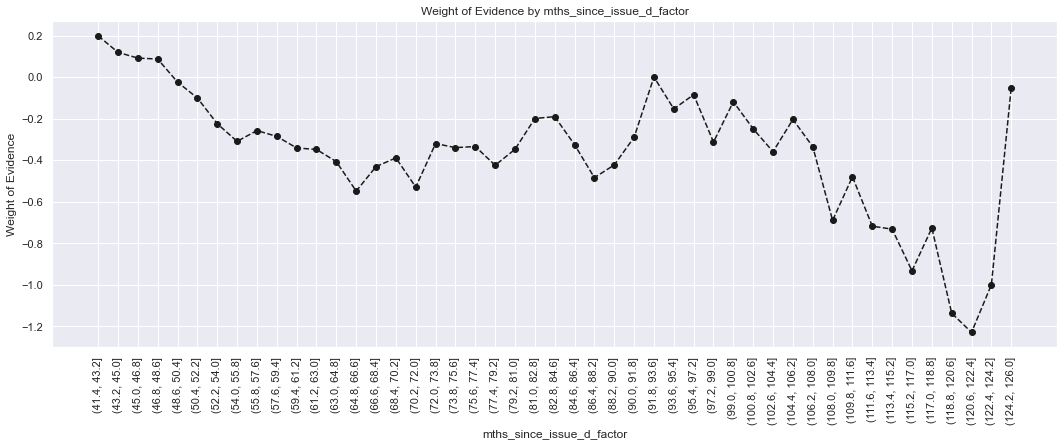

In [120]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [121]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [122]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [123]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


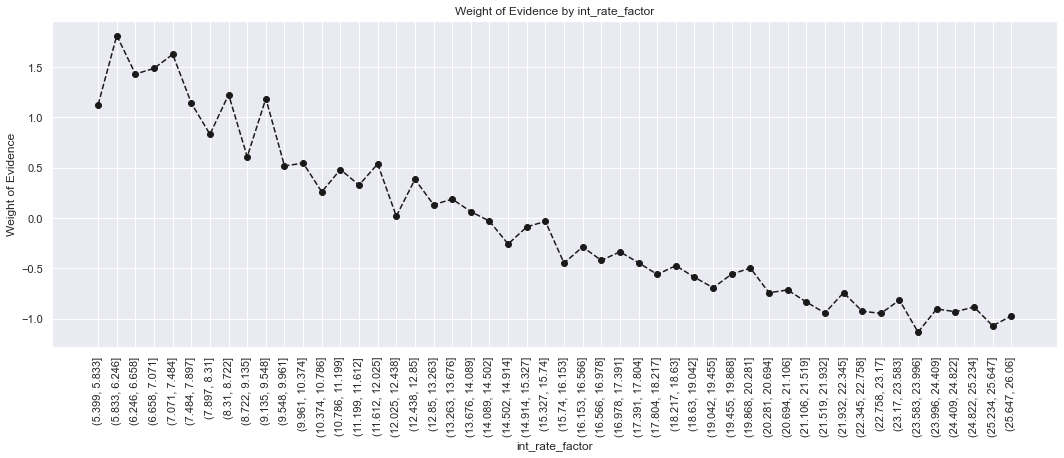

In [124]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [125]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [126]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [127]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.000656,0.006774,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.001213,0.012549,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.013910,0.153568,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.018449,0.199900,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.010399,0.108742,0.014139


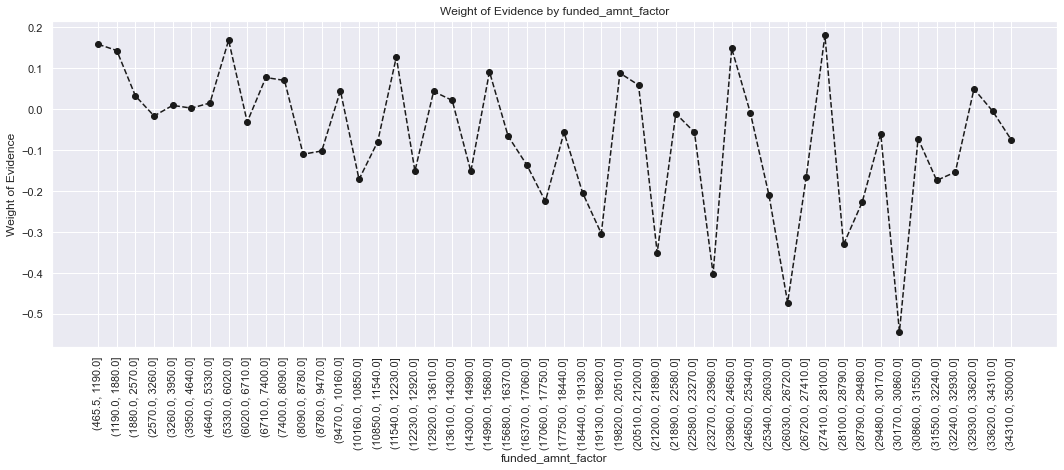

In [128]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Data Preparation: Continuous Variables, Part 1 and 2: Homework

In [129]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.623, 12.46]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,0.016381
1,"(12.46, 24.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016381
2,"(24.92, 37.38]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016381
3,"(37.38, 49.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016381
4,"(49.84, 62.3]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016381
5,"(62.3, 74.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016381
6,"(74.76, 87.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016381
7,"(87.22, 99.68]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016381
8,"(99.68, 112.14]",146,0.863014,0.000391,126.0,20.0,0.000379,0.000490,-0.257195,NaN,NaN,0.016381
9,"(112.14, 124.6]",1669,0.901738,0.004474,1505.0,164.0,0.004530,0.004022,0.118937,0.038724,0.376132,0.016381


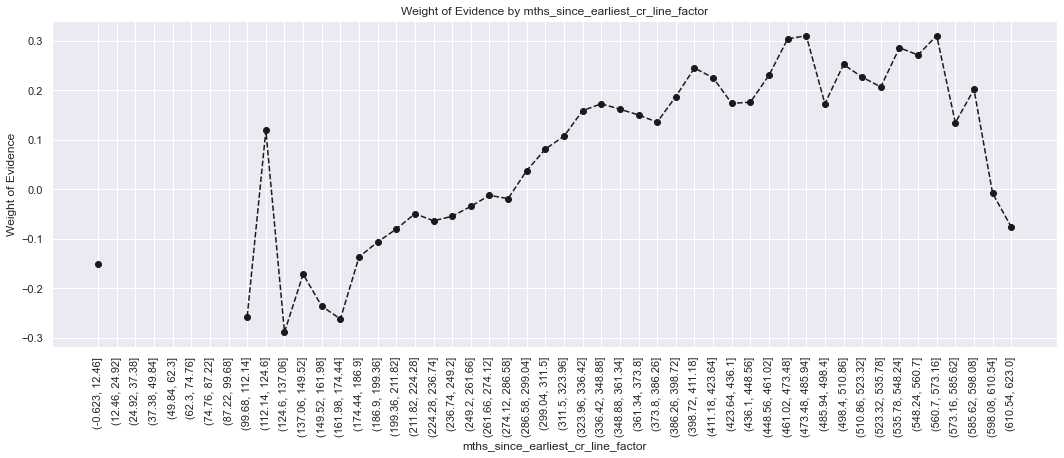

In [130]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

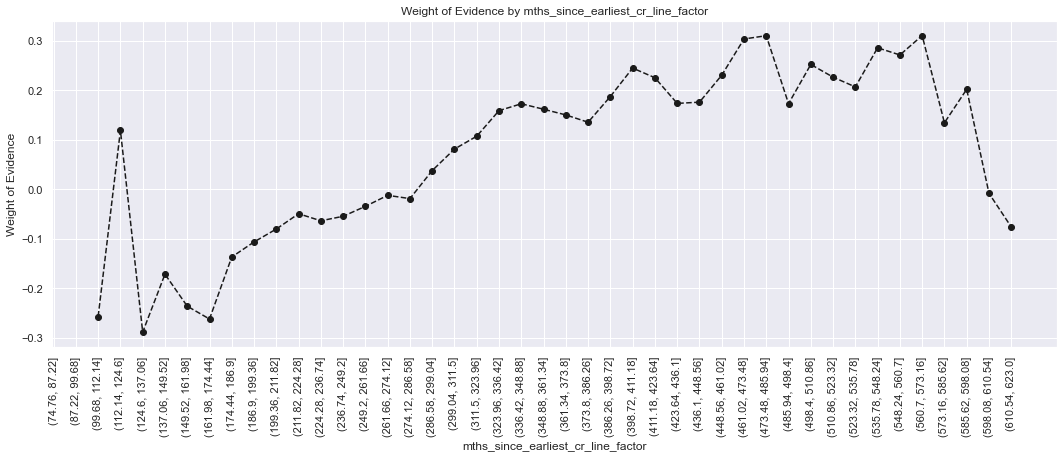

In [131]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [132]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [133]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,0.016835,0.172819,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,0.020208,0.210474,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,0.041981,0.404785,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,0.045190,0.441705,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,0.017765,0.191920,inf


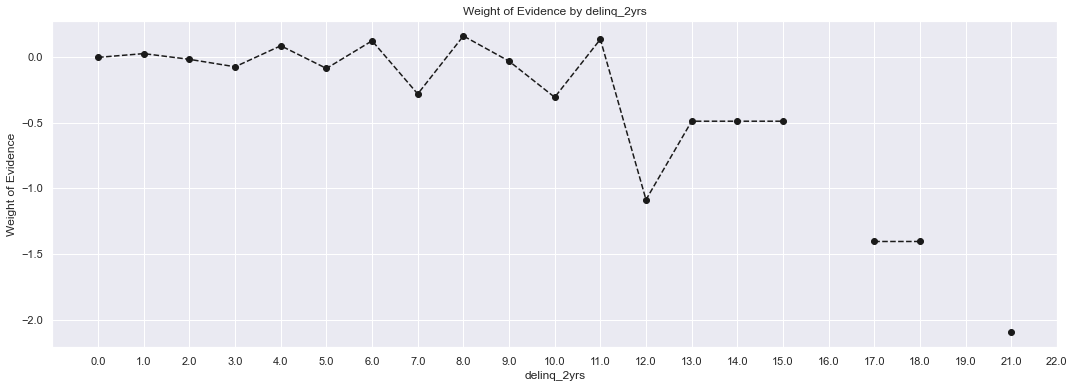

In [134]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [135]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [136]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\USR\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,0.030854,0.137370,inf


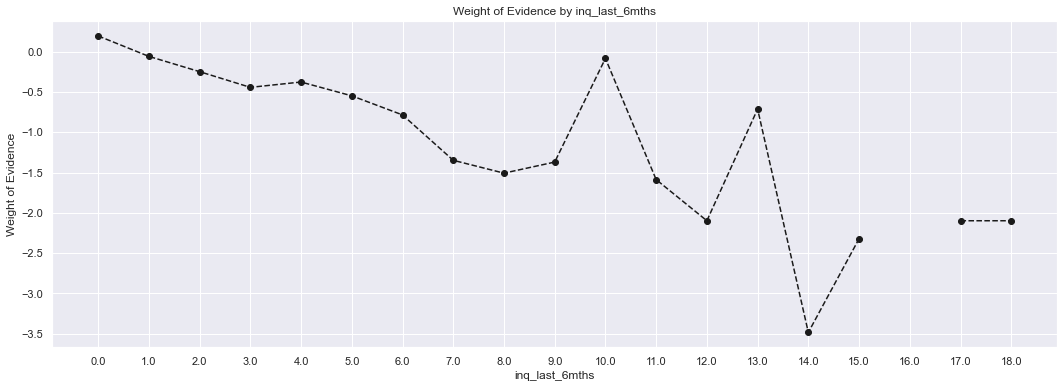

In [137]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [138]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [139]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\USR\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,0.017817,0.172239,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.045711,0.005879,0.000249,0.002571,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.064986,0.017419,0.001113,0.011540,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.080239,0.008868,0.000824,0.008550,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.089730,0.003592,0.000511,0.005276,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.095787,-0.015204,0.001838,0.018796,inf


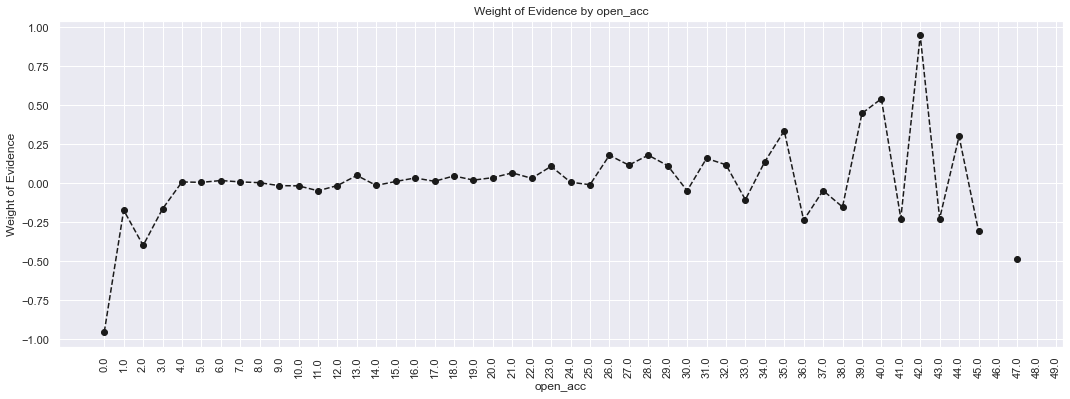

In [140]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

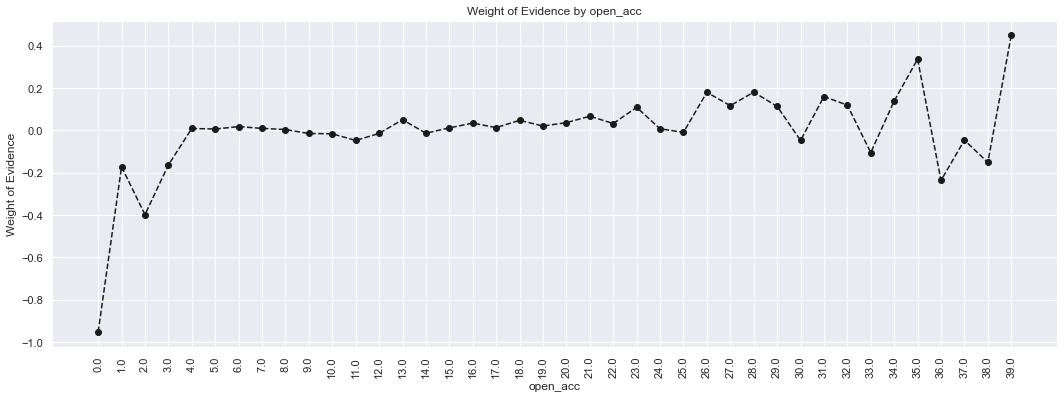

In [141]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [142]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [143]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,NaN,NaN,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,0.003478,0.036014,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,0.009828,0.107684,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,0.017065,0.212764,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,0.003707,0.051657,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,0.012690,0.168274,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,0.020294,0.281922,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,0.026709,0.523588,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,0.214286,inf,inf


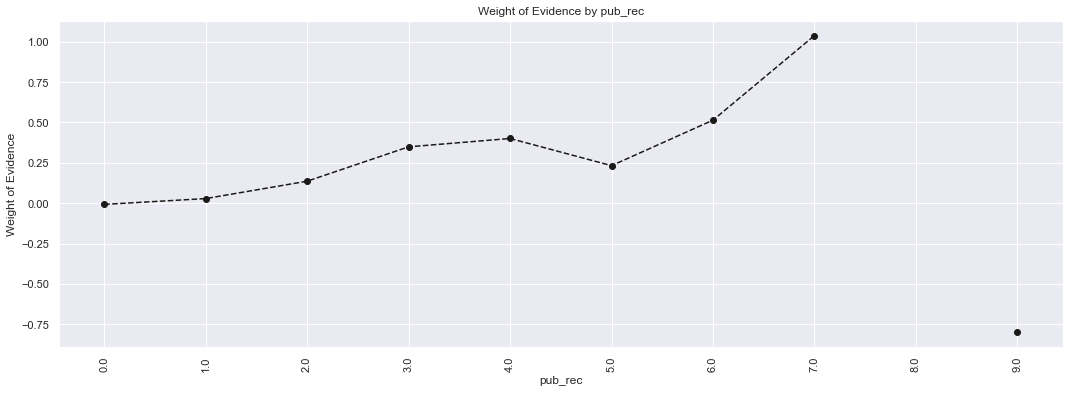

In [144]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [145]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [146]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.002134,-0.644759,NaN,NaN,inf
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.019913,-0.242371,0.054299,0.402388,inf
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.046814,-0.168816,0.008374,0.073555,inf
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.073275,-0.093113,0.008152,0.075703,inf
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,0.000001,0.000011,inf
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.107018,-0.034619,0.005986,0.058505,inf
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.113345,-0.045693,0.001112,0.011073,inf
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.106871,0.008329,0.005337,0.054022,inf
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.093040,0.049828,0.003950,0.041499,inf
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,0.003661,0.039725,inf


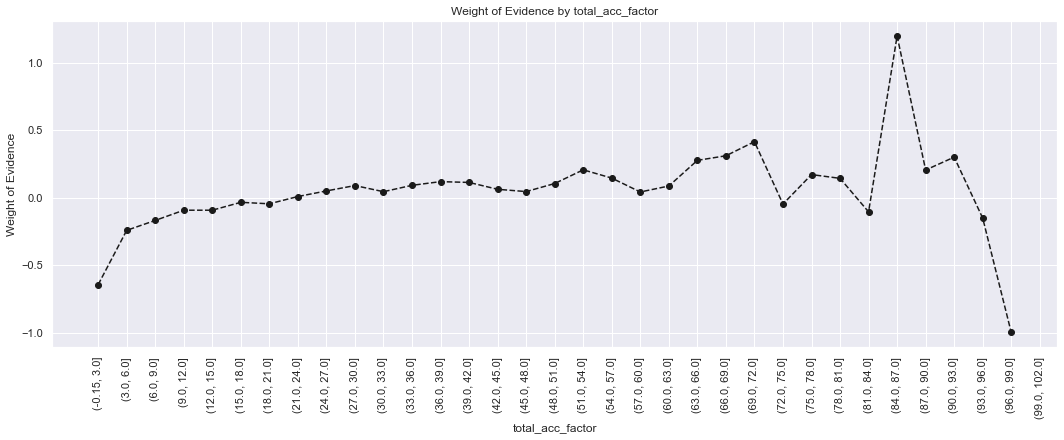

In [147]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [148]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [149]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,NaN,NaN,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,0.008797,0.093700,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,0.029126,0.373868,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,0.071429,0.773190,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf


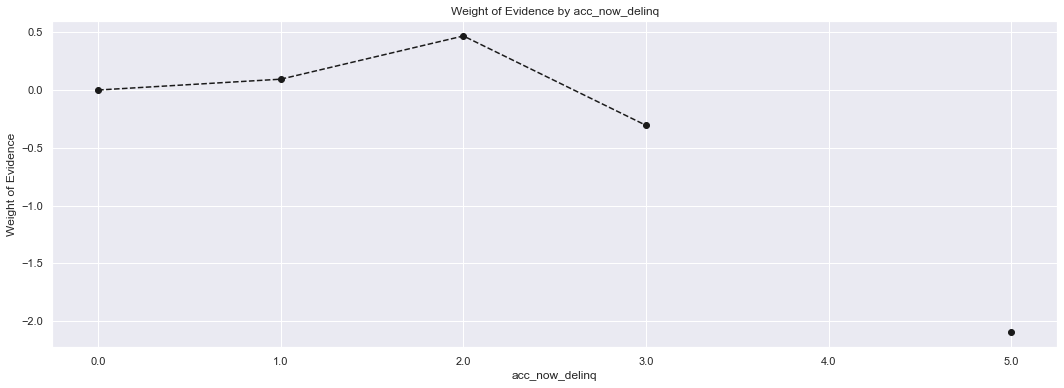

In [150]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [151]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [152]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\USR\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19417,0.866457,0.052052,16824.0,2593.0,0.050637,0.063588,-0.227754,NaN,NaN,inf
1,"(5000.0, 9999.999]",52655,0.876194,0.141156,46136.0,6519.0,0.138859,0.159866,-0.140872,0.009737,0.086882,inf
2,"(9999.999, 14999.998]",59570,0.880376,0.159693,52444.0,7126.0,0.157845,0.174751,-0.101749,0.004182,0.039123,inf
3,"(14999.998, 19999.998]",51455,0.877582,0.137939,45156.0,6299.0,0.135910,0.154471,-0.128013,0.002794,0.026264,inf
4,"(19999.998, 24999.997]",41582,0.885792,0.111472,36833.0,4749.0,0.110859,0.116460,-0.049285,0.008210,0.078728,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


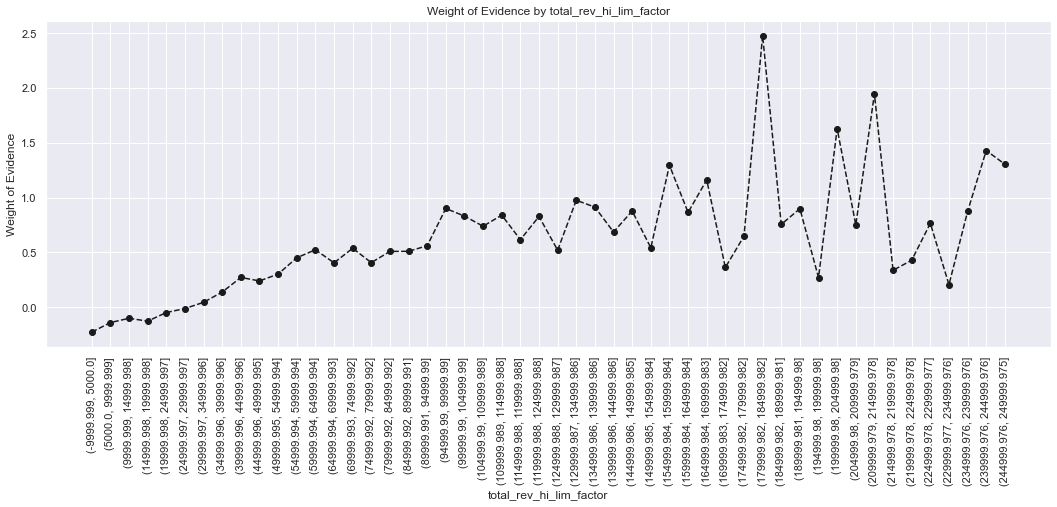

In [153]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [154]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [155]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.004169,0.170127,NaN,NaN,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.012163,0.072460,0.008639,0.097667,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.017902,0.024270,0.004517,0.048190,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.024572,-0.003444,0.002677,0.027715,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.025479,0.061332,0.006166,0.064776,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.043626,0.036717,0.002306,0.024615,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.040193,0.153964,0.010590,0.117247,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.036858,0.103905,0.004400,0.050059,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.045564,0.115026,0.000993,0.011121,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.053681,0.004225,0.010296,0.110801,0.013497


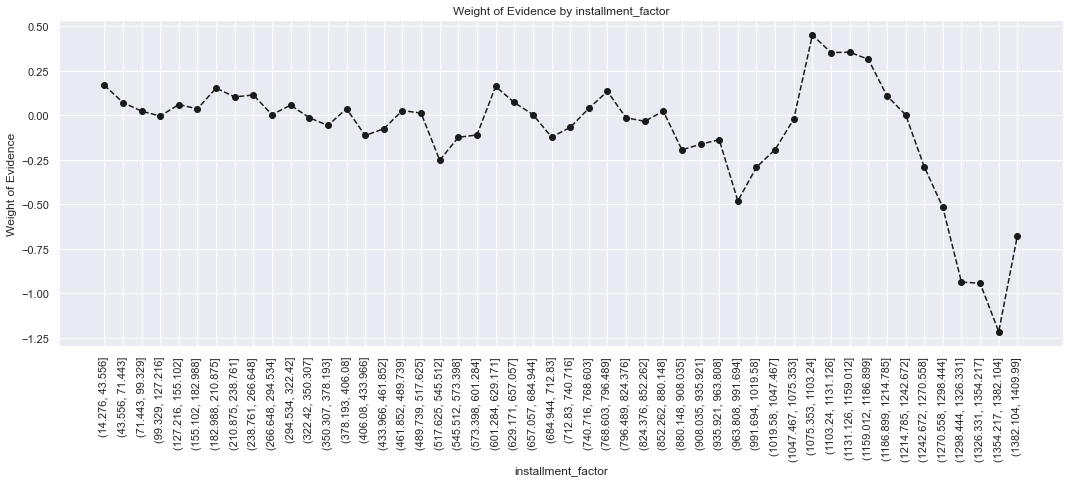

In [156]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [157]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,NaN,NaN,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,0.036871,0.442440,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,0.005055,0.075651,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,0.009267,0.153002,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,0.055830,0.717100,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,0.008379,0.084362,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,0.082051,1.523053,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,0.025641,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,0.000000,NaN,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,0.000000,NaN,inf


In [158]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 73294.82]",231445,0.875901,0.620449,202723.0,28722.0,0.610152,0.704350,-0.143568,NaN,NaN,inf
1,"(73294.82, 144693.64]",120459,0.912900,0.322922,109967.0,10492.0,0.330977,0.257296,0.251822,0.036998,0.395390,inf
2,"(144693.64, 216092.46]",15885,0.925087,0.042584,14695.0,1190.0,0.044229,0.029182,0.415809,0.012187,0.163987,inf
3,"(216092.46, 287491.28]",3119,0.927220,0.008361,2892.0,227.0,0.008704,0.005567,0.447009,0.002134,0.031200,inf
4,"(287491.28, 358890.1]",1117,0.929275,0.002994,1038.0,79.0,0.003124,0.001937,0.477858,0.002055,0.030850,inf
5,"(358890.1, 430288.92]",408,0.933824,0.001094,381.0,27.0,0.001147,0.000662,0.549218,0.004549,0.071359,inf
6,"(430288.92, 501687.74]",245,0.946939,0.000657,232.0,13.0,0.000698,0.000319,0.784043,0.013115,0.234826,inf
7,"(501687.74, 573086.56]",87,0.919540,0.000233,80.0,7.0,0.000241,0.000172,0.338372,0.027399,0.445672,inf
8,"(573086.56, 644485.38]",61,0.868852,0.000164,53.0,8.0,0.000160,0.000196,-0.206895,0.050688,0.545266,inf
9,"(644485.38, 715884.2]",51,0.901961,0.000137,46.0,5.0,0.000138,0.000123,0.121459,0.033108,0.328353,inf


In [159]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [160]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\USR\AppData\Local\Temp/ipykernel_6636/2604529898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.689458,NaN,NaN,0.049818
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000256,-0.977140,0.050000,0.287682,0.049818
2,"(7420.16, 10182.24]",287,0.874564,0.000818,251.0,36.0,0.000805,0.000920,-0.133818,0.124564,0.843322,0.049818
3,"(10182.24, 12944.32]",547,0.828154,0.001558,453.0,94.0,0.001452,0.002402,-0.503155,0.046411,0.369337,0.049818
4,"(12944.32, 15706.4]",1210,0.830579,0.003447,1005.0,205.0,0.003222,0.005238,-0.486019,0.002425,0.017135,0.049818
5,"(15706.4, 18468.48]",1522,0.847569,0.004335,1290.0,232.0,0.004136,0.005928,-0.360092,0.016990,0.125927,0.049818
6,"(18468.48, 21230.56]",2928,0.855533,0.008340,2505.0,423.0,0.008031,0.010809,-0.297080,0.007964,0.063012,0.049818
7,"(21230.56, 23992.64]",2495,0.844489,0.007107,2107.0,388.0,0.006755,0.009914,-0.383737,0.011044,0.086657,0.049818
8,"(23992.64, 26754.72]",7016,0.848632,0.019985,5954.0,1062.0,0.019088,0.027137,-0.351843,0.004143,0.031894,0.049818
9,"(26754.72, 29516.8]",5643,0.857345,0.016074,4838.0,805.0,0.015510,0.020570,-0.282338,0.008714,0.069505,0.049818


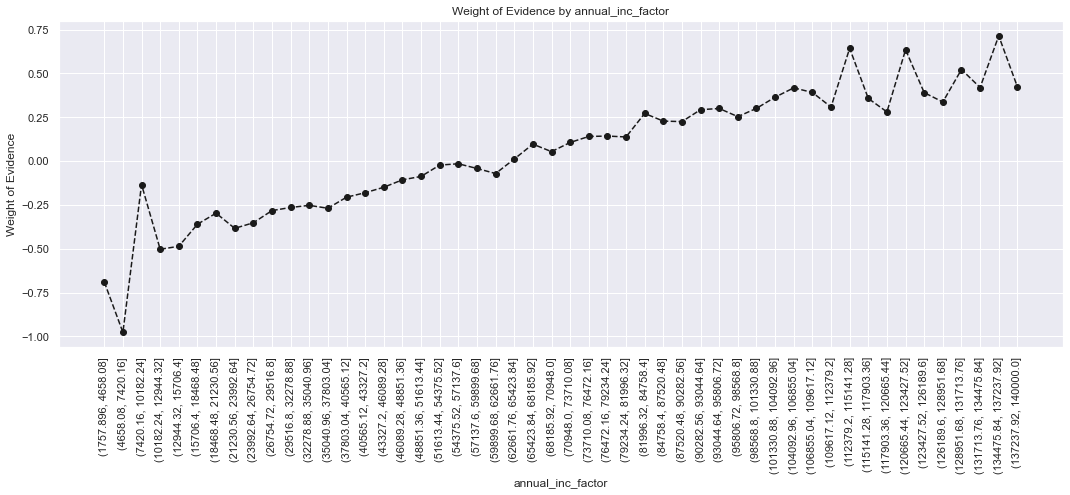

In [161]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [162]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [163]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\USR\AppData\Local\Temp/ipykernel_6636/1373989647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,NaN,NaN,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,0.016097,0.152164,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,0.005215,0.053372,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,0.003983,0.040967,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,0.006087,0.063147,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,0.002227,0.023470,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,0.003592,0.038062,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,0.001223,0.013085,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,0.007115,0.078141,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,0.004794,0.053184,inf


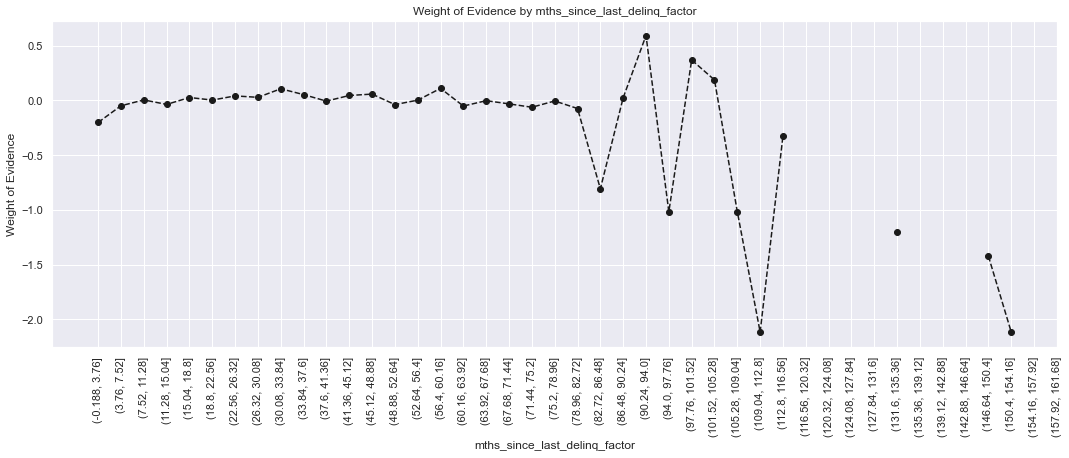

In [164]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [165]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

In [166]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",745,0.876510,0.001997,653.0,92.0,0.001965,0.002256,-0.137956,NaN,NaN,0.028446
1,"(0.4, 0.8]",808,0.919554,0.002166,743.0,65.0,0.002236,0.001594,0.338564,4.304439e-02,4.765202e-01,0.028446
2,"(0.8, 1.2]",922,0.896963,0.002472,827.0,95.0,0.002489,0.002330,0.066183,2.259133e-02,2.723810e-01,0.028446
3,"(1.2, 1.6]",1043,0.896453,0.002796,935.0,108.0,0.002814,0.002648,0.060670,5.105829e-04,5.512501e-03,0.028446
4,"(1.6, 2.0]",1172,0.902730,0.003142,1058.0,114.0,0.003184,0.002796,0.130192,6.277835e-03,6.952186e-02,0.028446
5,"(2.0, 2.399]",1337,0.916978,0.003584,1226.0,111.0,0.003690,0.002722,0.304237,1.424793e-02,1.740448e-01,0.028446
6,"(2.399, 2.799]",1538,0.916125,0.004123,1409.0,129.0,0.004241,0.003163,0.293078,8.534722e-04,1.115881e-02,0.028446
7,"(2.799, 3.199]",1696,0.904481,0.004547,1534.0,162.0,0.004617,0.003973,0.150293,1.164371e-02,1.427855e-01,0.028446
8,"(3.199, 3.599]",1927,0.900363,0.005166,1735.0,192.0,0.005222,0.004708,0.103522,4.117873e-03,4.677033e-02,0.028446
9,"(3.599, 3.999]",2197,0.914429,0.005890,2009.0,188.0,0.006047,0.004610,0.271205,1.406551e-02,1.676831e-01,0.028446


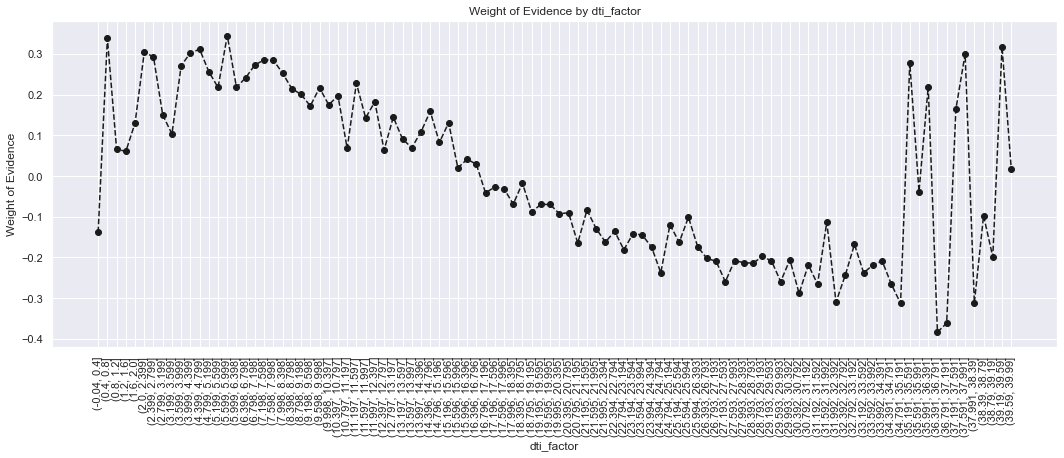

In [167]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [168]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [169]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\USR\AppData\Local\Temp/ipykernel_6636/337294594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1366,0.894583,0.003690,1222.0,144.0,0.003707,0.003560,0.040465,NaN,NaN,0.027289
1,"(0.7, 1.4]",1664,0.893029,0.004496,1486.0,178.0,0.004507,0.004400,0.024094,0.001554,0.016371,0.027289
2,"(1.4, 2.1]",1986,0.912890,0.005365,1813.0,173.0,0.005499,0.004276,0.251481,0.019861,0.227387,0.027289
3,"(2.1, 2.8]",2594,0.913261,0.007008,2369.0,225.0,0.007186,0.005562,0.256157,0.000371,0.004676,0.027289
4,"(2.8, 3.5]",3135,0.903030,0.008470,2831.0,304.0,0.008587,0.007515,0.133392,0.010231,0.122765,0.027289
5,"(3.5, 4.2]",3844,0.915713,0.010385,3520.0,324.0,0.010677,0.008009,0.287507,0.012682,0.154115,0.027289
6,"(4.2, 4.9]",4595,0.914037,0.012414,4200.0,395.0,0.012739,0.009764,0.265988,0.001676,0.021519,0.027289
7,"(4.9, 5.6]",5312,0.912651,0.014351,4848.0,464.0,0.014705,0.011470,0.248471,0.001386,0.017517,0.027289
8,"(5.6, 6.3]",5927,0.914797,0.016013,5422.0,505.0,0.016446,0.012483,0.275696,0.002146,0.027225,0.027289
9,"(6.3, 7.0]",6482,0.911601,0.017512,5909.0,573.0,0.017923,0.014164,0.235381,0.003195,0.040315,0.027289


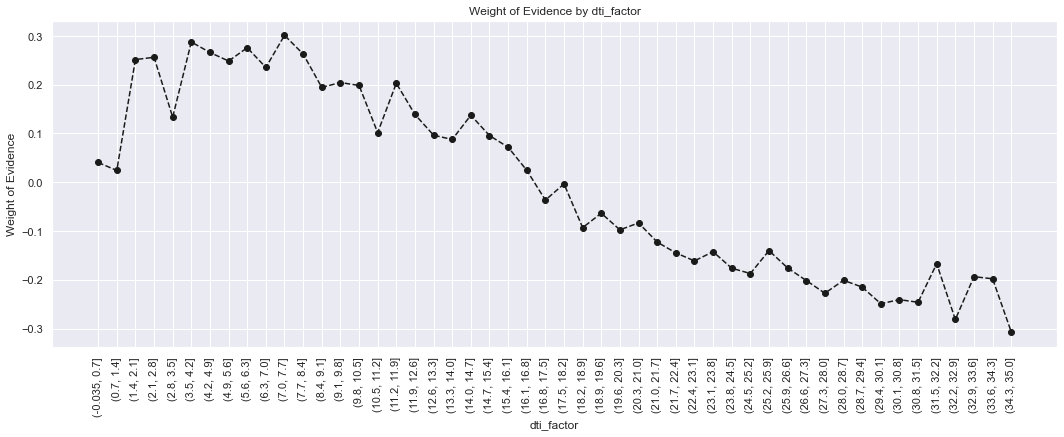

In [170]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [171]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [172]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\USR\AppData\Local\Temp/ipykernel_6636/3035104871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1086,0.764273,0.021691,830.0,256.0,0.018569,0.047672,-0.942830,NaN,NaN,0.080659
1,"(2.42, 4.84]",76,0.894737,0.001518,68.0,8.0,0.001521,0.001490,0.020988,0.130464,0.963818,0.080659
2,"(4.84, 7.26]",163,0.914110,0.003256,149.0,14.0,0.003334,0.002607,0.245810,0.019374,0.224823,0.080659
3,"(7.26, 9.68]",156,0.903846,0.003116,141.0,15.0,0.003155,0.002793,0.121631,0.010264,0.124179,0.080659
4,"(9.68, 12.1]",292,0.907534,0.005832,265.0,27.0,0.005929,0.005028,0.164814,0.003688,0.043183,0.080659
5,"(12.1, 14.52]",207,0.917874,0.004134,190.0,17.0,0.004251,0.003166,0.294732,0.010340,0.129918,0.080659
6,"(14.52, 16.94]",210,0.928571,0.004194,195.0,15.0,0.004363,0.002793,0.445871,0.010697,0.151139,0.080659
7,"(16.94, 19.36]",334,0.907186,0.006671,303.0,31.0,0.006779,0.005773,0.160667,0.021386,0.285204,0.080659
8,"(19.36, 21.78]",283,0.936396,0.005652,265.0,18.0,0.005929,0.003352,0.570280,0.029210,0.409612,0.080659
9,"(21.78, 24.2]",455,0.898901,0.009088,409.0,46.0,0.009151,0.008566,0.065995,0.037495,0.504284,0.080659


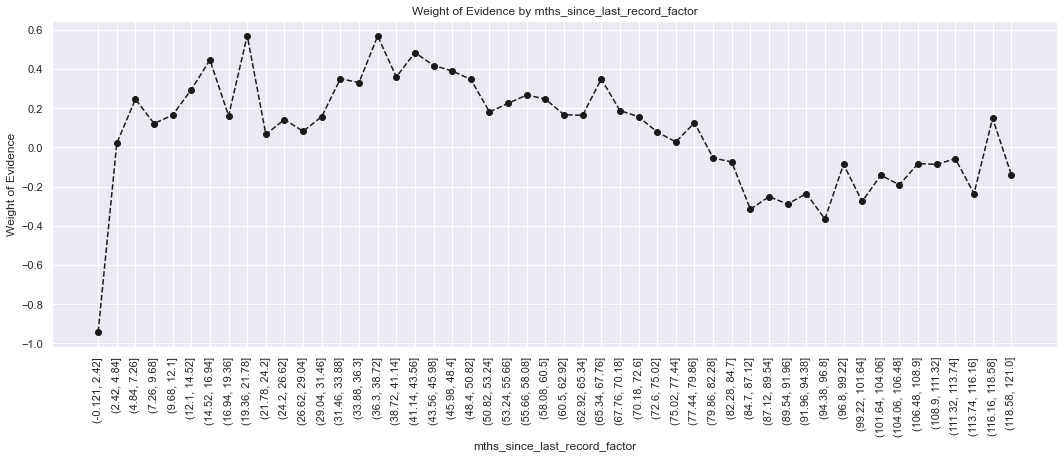

In [173]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [174]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test Dataset

In [175]:
loan_data_inputs_train = df_inputs_prepr
#####
#loan_data_inputs_test = df_inputs_prepr

In [176]:
df_inputs_prepr

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,mths_si

In [298]:
#loan_data_inputs_train.to_csv('loan_data_inputs_train2.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train2.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test2.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test2.csv')